#Mid-term exercise

Submitters:

1.   Shani Eliyahou - 322691668
2.   Oren Jacob - 315942763
3.   Amir Khier - 315128967





#1. Load your libraries here:

In [ ]:
#your code here:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

#Upload your data file:

In [ ]:
from google.colab import files
file = files.upload()

Saving neo.csv to neo.csv


#2. Read the file into a pandas data frame:
Split your data to:

a. X: the feature matrix

b. y: the label vector

In [ ]:
#your code here:
df = pd.read_csv("neo.csv")
X_features = df.drop(['hazardous', 'orbiting_body', 'id', 'name', 'sentry_object'], axis=1)
Y_target = df['hazardous']

#3. Check for missing values:

In [ ]:
#your code here:
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

If there are no missing values in your data, follow the next steps:
1. uncomment the following function by:

  a. selecting all the code in the chunk

  b. pressing "ctrl"+"/" to uncomment all lines
2. assign the missing values-containing data to a new variable name (see example below).

Say my dataset features is named X.

Than the use of the function would be:


```
X_missing=add_missing_values(X)
 ```






In [ ]:
def add_missing_values(X_full):
     import numpy as np
     Col_names=X_full.columns
     X_full=X_full.to_numpy()
     rng = np.random.RandomState(4)
     n_samples, n_features = X_full.shape

     # Add missing values in 75% of the lines
     missing_rate = 0.75
     n_missing_samples = int(n_samples * missing_rate)

     missing_samples = np.zeros(n_samples, dtype=bool)
     missing_samples[:n_missing_samples] = True

     rng.shuffle(missing_samples)
     missing_features = rng.randint(0, n_features, n_missing_samples)
     X_missing = X_full.copy()
     X_missing[missing_samples, missing_features] = np.nan
     X_missing=pd.DataFrame(X_missing)
     X_missing.columns=Col_names
     return X_missing
     # X_missing


In [ ]:
#your code here, if there are no missing values:
X_features_missing = add_missing_values(X_features)


#4. Impute the missing values using three different methods and assign the imputed output datasets into variables:

In [ ]:
#your code here:

# Due to a large dataset, KNNImputer is inefficient and takes a long time to run,
# so we decided to impute missing value by SimpleImputer where startegy equals to 'median' instead.

# knnimpute = KNNImputer(n_neighbors=5)
# X_imputed_by_KNN = knnimpute.fit_transform(X_features_missing)
# X_imputed_by_KNN = pd.DataFrame(X_imputed_by_KNN, columns=X_features_missing.columns)

#Impute by medians
medimp = SimpleImputer(missing_values=np.nan , strategy='median')
X_imputed_by_median = medimp.fit_transform(X_features_missing.values)
X_imputed_by_median_df = pd.DataFrame(X_imputed_by_median,columns=X_features_missing.columns)


# Impute by means
imr = SimpleImputer(missing_values=np.nan , strategy='mean')
X_imputed_by_mean = imr.fit_transform(X_features_missing.values)
X_imputed_by_mean_df = pd.DataFrame(X_imputed_by_mean,columns=X_features_missing.columns)

# New Way to do Impute - iterative imputer:
X_imputed_by_iterative = IterativeImputer(random_state=0, min_value=0).fit_transform(X_features_missing)
X_imputed_by_iterative_df = pd.DataFrame(X_imputed_by_iterative, columns=X_features_missing.columns)




#5. Preprocessing (for both imputed datasets):
a. standardize or normalize the data

  

In [ ]:
#your code here:
#Normalizing data:
X_imputed_by_median_norm = MinMaxScaler().fit_transform(X_imputed_by_median)
X_imputed_by_median_norm_df = pd.DataFrame(X_imputed_by_median_norm, columns=X_imputed_by_median_df.columns)

X_imputed_by_mean_norm = MinMaxScaler().fit_transform(X_imputed_by_mean)
X_imputed_by_mean_norm_df = pd.DataFrame(X_imputed_by_mean_norm, columns=X_imputed_by_mean_df.columns)

X_imputed_by_iterative_norm = MinMaxScaler().fit_transform(X_imputed_by_iterative)
X_imputed_by_iterative_norm_df = pd.DataFrame(X_imputed_by_iterative_norm, columns=X_imputed_by_iterative_df.columns)

b. print visual representation of the y variable (the output/label variable) or/and value counts of the two categories to test if the data is imbalanced.

False    81996
True      8840
Name: hazardous, dtype: int64


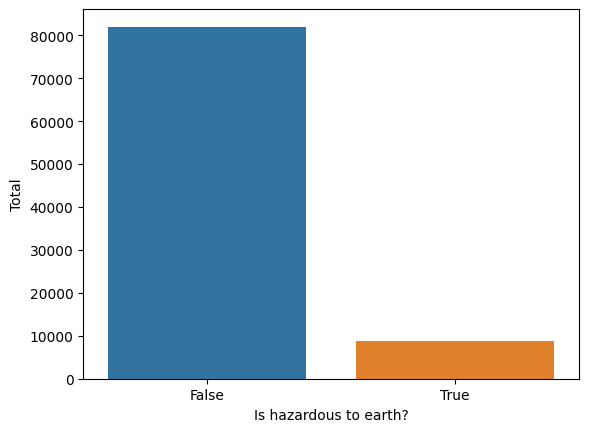

In [ ]:
counts = Y_target.value_counts()
hazardous_count_bar = sns.barplot(x=counts.index, y=counts.values)
hazardous_count_bar.set(xlabel='Is hazardous to earth?', ylabel='Total')
print(counts)
plt.show()

#c. Verbally explain if balancing the label is required, why? (in 2-3 lines)


#Your answer here:

As it can be seen from the bar plot above, 'hazardous' label is imbalanced.
Balancing this label is required because the learning algorithm might become biased toward the majority class, meaning it might biased toward the objects that are not hazardous to earth. We are more interested on predicting objects that are hazardous to earth.

#6. If balancing is required, choose one balancing method and perform it on your data.

Verbally explain the logic behind the chosen balancing metohd, how does it work?

In [ ]:
#your code here, if balancing is requierd:
sampler = RandomUnderSampler(random_state=8123)
X_median_resampled, y_target_resampled = sampler.fit_resample(X_imputed_by_median_norm.tolist(), Y_target.values.tolist())
X_mean_resampled, y_target_resampled = sampler.fit_resample(X_imputed_by_mean_norm.tolist(), Y_target.values.tolist())
X_iterative_resampled, y_target_resampled = sampler.fit_resample(X_imputed_by_iterative_norm.tolist(), Y_target.values.tolist())

#Your answer here:

Random undersampling is a balancing method that randomly removes instances from the majority class. This method removes random rows from the dataset that their target column's value belongs to the majority class and finally creates a balanced dataset.


#7. Train test split:

In [ ]:
train_median_X, test_median_X, train_median_Y, test_median_Y = train_test_split(X_median_resampled,y_target_resampled,test_size=0.2,random_state=8123)

In [ ]:
train_mean_X, test_mean_X, train_mean_Y, test_mean_Y = train_test_split(X_mean_resampled,y_target_resampled,test_size=0.2,random_state=8123)

In [ ]:
train_iterative_X, test_iterative_X, train_iterative_Y, test_iterative_Y = train_test_split(X_iterative_resampled,y_target_resampled,test_size=0.2,random_state=8123)

#8. Training models (for both imputed datasets):
**a.** choose three classification algorithms, one must be either random forest or XGBoost or catboost, and apply the algorithms on the train set.  

**b.** apply hyperparameter tuning on at least two algorithms using gridsearchCV function.

**c.** print the best hyperparameters for the three models.

Reminder, if the tuned model is named "grid" than to get the best hyperparameter combination use the following function:


```
grid.best_params_
```





GridSearchCV of two models (Random Forest,Support Vector Machine) with imputed dataset by median and training logistic regression model

In [ ]:
random_forest_median = RandomForestClassifier(random_state=8123)
median_param_grid ={
    'n_estimators' : [50,55,60],
    'max_depth': [8,9,10],
    'max_features' :['sqrt','log2'],
    'criterion' :['gini','entropy']

}
gs_rfc_median = GridSearchCV(estimator=random_forest_median, param_grid=median_param_grid, n_jobs=-1)
gs_rfc_median.fit(train_median_X,train_median_Y)

print("Random Forest Classifier's grid search results for median imputed datasets:")
print("\nThe best parameters across ALL searched params:\n",gs_rfc_median.best_params_)

Random Forest Classifier's grid search results for median imputed datasets:

The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 55}


In [ ]:
#Training the model with the best parameters found
random_forest_median=RandomForestClassifier(n_estimators=55,max_depth=9, max_features='sqrt', criterion='entropy', random_state=8123)
random_forest_median.fit(train_median_X, train_median_Y)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=55,
                       random_state=8123)

In [ ]:
svc_median=SVC(random_state=8123)

median_param_grid_svc = {
    'C': [4.5,5,5.5],
    'gamma': [0,0.0125,0.025]
    ,'kernel' : ['rbf','linear','poly']
}

gs_svc_median = GridSearchCV(estimator=svc_median, param_grid=median_param_grid_svc, n_jobs=-1)
gs_svc_median.fit(train_median_X, train_median_Y)

print("Support Vector Classifier's grid search results median imputed datasets:")
print("\nThe best parameters across ALL searched params:\n",gs_svc_median.best_params_)

Support Vector Classifier's grid search results median imputed datasets:

The best parameters across ALL searched params:
 {'C': 5, 'gamma': 0, 'kernel': 'linear'}


In [ ]:
#Training the model with the best parameters found
svc_median=SVC(C=5, gamma=0, kernel='linear',random_state=8123)
svc_median.fit(train_median_X, train_median_Y)

SVC(C=5, gamma=0, kernel='linear', random_state=8123)

In [ ]:
#Training logistic regression model
logistic_median = LogisticRegression(random_state=8123).fit(train_median_X, train_median_Y)

GridSearchCV of two models (Random Forest,Support Vector Machine) with imputed dataset by mean and training logistic regression model

In [ ]:
random_forest_mean = RandomForestClassifier(random_state=8123)
mean_param_grid ={
    'n_estimators' : [50,55,60],
    'max_depth': [7,8,9],
    'max_features' :['sqrt','log2'],
    'criterion' :['gini','entropy']
}
gs_rfc_mean = GridSearchCV(estimator=random_forest_mean, param_grid=mean_param_grid, n_jobs=-1)
gs_rfc_mean.fit(train_mean_X,train_mean_Y)

print("Random Forest Classifier's grid search results for mean imputed datasets:")
print("\nThe best parameters across ALL searched params:\n",gs_rfc_mean.best_params_)

Random Forest Classifier's grid search results for mean imputed datasets:

The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 55}


In [ ]:
#Training the model with the best parameters found
random_forest_mean=RandomForestClassifier(n_estimators=55,max_depth=8, max_features='sqrt', criterion='entropy', random_state=8123)
random_forest_mean.fit(train_mean_X, train_mean_Y)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=55,
                       random_state=8123)

In [ ]:
svc_mean=SVC(random_state=8123)
mean_param_grid_svc = {
    'C': [5,5.5,6],
    'gamma': [0]
    , 'kernel' :['linear']
}
gs_svc_mean = GridSearchCV(estimator=svc_mean, param_grid=mean_param_grid_svc, n_jobs=-1)
gs_svc_mean.fit(train_mean_X, train_mean_Y)

print("Support Vector Classifier's grid search results mean imputed datasets:")
print("\nThe best parameters across ALL searched params:\n",gs_svc_mean.best_params_)

Support Vector Classifier's grid search results mean imputed datasets:

The best parameters across ALL searched params:
 {'C': 5.5, 'gamma': 0, 'kernel': 'linear'}


In [ ]:
#Training the model with the best parameters found
svc_mean=SVC(C=5.5, gamma=0, kernel='linear',random_state=8123)
svc_mean.fit(train_mean_X, train_mean_Y)

SVC(C=5.5, gamma=0, kernel='linear', random_state=8123)

In [ ]:
#Training logistic regression model
logistic_mean = LogisticRegression(random_state=8123).fit(train_mean_X, train_mean_Y)

GridSearchCV of two models (Random Forest,Support Vector Machine) with imputed dataset by iterative and training logistic regression model

In [ ]:
random_forest_iterative=RandomForestClassifier(random_state=8123)

rfc_param_grid = {
    'n_estimators': [70,75,80],
    'max_depth': [6,7,8],
    'max_features': ['sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

gs_rfc_iterative = GridSearchCV(estimator=random_forest_iterative, param_grid=rfc_param_grid, n_jobs=-1)
gs_rfc_iterative.fit(train_iterative_X, train_iterative_Y)

print("Random Forest Classifier's grid search results:")
print("\nThe best parameters across ALL searched params:\n",gs_rfc_iterative.best_params_)

Random Forest Classifier's grid search results:

The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 75}


In [ ]:
#Training the model with the best parameters found
random_forest_iterative=RandomForestClassifier(n_estimators=75, max_features='sqrt', max_depth=7, criterion='entropy', random_state=8123)
random_forest_iterative.fit(train_iterative_X, train_iterative_Y)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=75,
                       random_state=8123)

In [ ]:
svc_iterative=SVC(random_state=8123)

svc_param_grid = {
    'C': [5.5,6,6.5],
    'gamma': [0.05,0.1,0.15]
    ,'kernel' :['rbf', 'linear', 'poly']
}

gs_svc_iterative = GridSearchCV(estimator=svc_iterative, param_grid=svc_param_grid, n_jobs=-1)
gs_svc_iterative.fit(train_iterative_X, train_iterative_Y)

print("Support Vector Classifier's grid search results:")
print("\nThe best parameters across ALL searched params:\n",gs_svc_iterative.best_params_)

In [ ]:
#Training the model with the best parameters found
svc_iterative=SVC(C=6, gamma=0.1, kernel='rbf', random_state=8123)
svc_iterative.fit(train_iterative_X, train_iterative_Y)

SVC(C=6, gamma=0.1, random_state=8123)

In [ ]:
#Training logistic regression model
logistic_iterative=LogisticRegression(random_state=8123)
logistic_iterative.fit(train_iterative_X, train_iterative_Y)

LogisticRegression(random_state=8123)

**d.** Veraverbally explain: what is the role of the chosen hyperparmeters in the learning algorithms? How did you choose the values for the optimization? (in 3-4 lines)

#Your answer here:



Support Vector Classification hyperparameters chosen:
*   **C** - penalty parameter of the error term.
*   **gamma** - kernel's coefficient, it defines the influence of a single training example reaches. A low value of 'gamma' causes the function to be wide and flat, and a high value for the function to be narrow and deep.
*   **kernel** - type of hyperplane used to separate the data.

Random Forest Classification hyperparameters chosen:
*   **n_estimators** - the number of trees in the forest.
*   **max_depth** - the maximum depth of each tree in the forest.
*   **max_features** - the number of features to take into account to make the best split.
*   **criterion** - the function that will be used to measure the quality of the split.

We chose the values of each hyperparameter by running an array of values for each parameter and by trial and error we found the best values of each.




#9. a. Predict the y variable on both the train set and the test set (for both imputed datasets and for both algorithms - 18 predictions in total):
3 imputed datasets * 3 models * (train+test)

and print the accuracy of each prediction.



# **Median imputed data predictions and results:**



#### Logistic Regression:

In [ ]:
# Train set predictions and results:
median_pred_train = logistic_median.predict(train_median_X)
print(classification_report(median_pred_train,train_median_Y))

              precision    recall  f1-score   support

       False       0.77      0.82      0.80      6679
        True       0.83      0.79      0.81      7465

    accuracy                           0.80     14144
   macro avg       0.80      0.80      0.80     14144
weighted avg       0.80      0.80      0.80     14144



In [ ]:
# Test set predictions and results:
median_pred_test = logistic_median.predict(test_median_X)
print(classification_report(median_pred_test,test_median_Y))

              precision    recall  f1-score   support

       False       0.77      0.82      0.79      1660
        True       0.83      0.78      0.81      1876

    accuracy                           0.80      3536
   macro avg       0.80      0.80      0.80      3536
weighted avg       0.80      0.80      0.80      3536



in logistic regression model with imputed media dataset

Accuracy train :0.8


Accuracy test : 0.8

#### Random forest Classification:

In [ ]:
# Train set predictions and results:
median_pred_train_RF = random_forest_median.predict(train_median_X)
print(classification_report(median_pred_train_RF,train_median_Y))

              precision    recall  f1-score   support

       False       0.77      0.99      0.87      5461
        True       1.00      0.81      0.89      8683

    accuracy                           0.88     14144
   macro avg       0.88      0.90      0.88     14144
weighted avg       0.91      0.88      0.88     14144



In [ ]:
# Test set predictions and results:
median_pred_test_RF = random_forest_median.predict(test_median_X)
print(classification_report(median_pred_test_RF,test_median_Y))

              precision    recall  f1-score   support

       False       0.75      0.99      0.86      1348
        True       0.99      0.80      0.89      2188

    accuracy                           0.87      3536
   macro avg       0.87      0.89      0.87      3536
weighted avg       0.90      0.87      0.87      3536



in random forest model with imputed median dataset

Accuracy train :0.88

Accuracy test : 0.87

#### Support Vector Classification:

In [ ]:
# Train set predictions and results:
median_pred_train_SVC = svc_median.predict(train_median_X)
print(classification_report(median_pred_train_SVC,train_median_Y))

              precision    recall  f1-score   support

       False       0.76      0.84      0.80      6465
        True       0.85      0.78      0.82      7679

    accuracy                           0.81     14144
   macro avg       0.81      0.81      0.81     14144
weighted avg       0.81      0.81      0.81     14144



In [ ]:
# Test set predictions and results:
median_pred_test_SVC = svc_median.predict(test_median_X)
print(classification_report(median_pred_test_SVC,test_median_Y))

              precision    recall  f1-score   support

       False       0.76      0.84      0.80      1599
        True       0.85      0.78      0.82      1937

    accuracy                           0.81      3536
   macro avg       0.81      0.81      0.81      3536
weighted avg       0.81      0.81      0.81      3536



in support vector machine with imputed median dataset

Accuracy train :0.81

Accuracy test : 0.81



# **Mean imputed data predictions and results:**



#### Logistic Regression:

In [ ]:
# Train set predictions and results:
mean_pred_train = logistic_mean.predict(train_mean_X)
print(classification_report(mean_pred_train,train_mean_Y))

              precision    recall  f1-score   support

       False       0.78      0.82      0.80      6701
        True       0.83      0.79      0.81      7443

    accuracy                           0.80     14144
   macro avg       0.80      0.80      0.80     14144
weighted avg       0.80      0.80      0.80     14144



In [ ]:
# Test set predictions and results:
mean_pred_test = logistic_mean.predict(test_mean_X)
print(classification_report(mean_pred_test,test_mean_Y))

              precision    recall  f1-score   support

       False       0.77      0.82      0.79      1667
        True       0.83      0.79      0.81      1869

    accuracy                           0.80      3536
   macro avg       0.80      0.80      0.80      3536
weighted avg       0.80      0.80      0.80      3536



in logistic regression model with imputed mean dataset

Accuracy train :0.8

Accuracy test : 0.8

#### Random forest Classification:

In [ ]:
# Train set predictions and results:
mean_pred_train_RF = random_forest_mean.predict(train_mean_X)
print(classification_report(mean_pred_train_RF,train_mean_Y))

              precision    recall  f1-score   support

       False       0.76      0.99      0.86      5455
        True       0.99      0.81      0.89      8689

    accuracy                           0.88     14144
   macro avg       0.88      0.90      0.88     14144
weighted avg       0.91      0.88      0.88     14144



In [ ]:
# Test set predictions and results:
mean_pred_test_RF = random_forest_mean.predict(test_mean_X)
print(classification_report(mean_pred_test_RF,test_mean_Y))

              precision    recall  f1-score   support

       False       0.75      0.99      0.85      1346
        True       0.99      0.80      0.89      2190

    accuracy                           0.87      3536
   macro avg       0.87      0.89      0.87      3536
weighted avg       0.90      0.87      0.87      3536



in random forest model with imputed mean dataset

Accuracy train :0.88

Accuracy test : 0.87

#### Support Vector Classification:

In [ ]:
# Train set predictions and results:
mean_pred_train_SVC = svc_mean.predict(train_mean_X)
print(classification_report(mean_pred_train_SVC,train_mean_Y))

NameError: ignored

In [ ]:
# Test set predictions and results:
mean_pred_test_SVC = svc_mean.predict(test_mean_X)
print(classification_report(mean_pred_test_SVC,test_mean_Y))

              precision    recall  f1-score   support

       False       0.76      0.84      0.80      1588
        True       0.86      0.78      0.82      1948

    accuracy                           0.81      3536
   macro avg       0.81      0.81      0.81      3536
weighted avg       0.81      0.81      0.81      3536



in support vector machine with imputed mean dataset

Accuracy train :0.81

Accuracy test : 0.81


# **Iterative imputed data predictions and results:**

#### Logistic Regression:

In [ ]:
# Train set predictions and results:
iterative_pred_train_LR = logistic_iterative.predict(train_iterative_X)
print(classification_report(iterative_pred_train_LR,train_iterative_Y))

              precision    recall  f1-score   support

       False       0.77      0.86      0.81      6344
        True       0.87      0.79      0.83      7800

    accuracy                           0.82     14144
   macro avg       0.82      0.83      0.82     14144
weighted avg       0.83      0.82      0.82     14144



In [ ]:
# Test set predictions and results:
iterative_pred_test_LR = logistic_iterative.predict(test_iterative_X)
print(classification_report(iterative_pred_test_LR,test_iterative_Y))

              precision    recall  f1-score   support

       False       0.76      0.85      0.80      1573
        True       0.87      0.78      0.82      1963

    accuracy                           0.81      3536
   macro avg       0.81      0.82      0.81      3536
weighted avg       0.82      0.81      0.82      3536



#### Random forest Classification:

In [ ]:
# Train set predictions and results:
iterative_pred_train_RF = random_forest_iterative.predict(train_iterative_X)
print(classification_report(iterative_pred_train_RF,train_iterative_Y))

              precision    recall  f1-score   support

       False       0.76      0.99      0.86      5458
        True       0.99      0.81      0.89      8686

    accuracy                           0.88     14144
   macro avg       0.88      0.90      0.88     14144
weighted avg       0.90      0.88      0.88     14144



In [ ]:
# Test set predictions and results:
iterative_pred_test_RF = random_forest_iterative.predict(test_iterative_X)
print(classification_report(iterative_pred_test_RF,test_iterative_Y))

              precision    recall  f1-score   support

       False       0.75      0.99      0.86      1345
        True       0.99      0.80      0.89      2191

    accuracy                           0.87      3536
   macro avg       0.87      0.90      0.87      3536
weighted avg       0.90      0.87      0.88      3536



#### Support Vector Classification:

In [ ]:
# Train set predictions and results:
iterative_pred_train_SVC = svc_iterative.predict(train_iterative_X)
print(classification_report(iterative_pred_train_SVC,train_iterative_Y))

              precision    recall  f1-score   support

       False       0.73      0.90      0.81      5773
        True       0.92      0.77      0.84      8371

    accuracy                           0.83     14144
   macro avg       0.83      0.84      0.82     14144
weighted avg       0.84      0.83      0.83     14144



In [ ]:
# Test set predictions and results:
iterative_pred_test_SVC = svc_iterative.predict(test_iterative_X)
print(classification_report(iterative_pred_test_SVC,test_iterative_Y))

              precision    recall  f1-score   support

       False       0.72      0.90      0.80      1411
        True       0.92      0.77      0.84      2125

    accuracy                           0.82      3536
   macro avg       0.82      0.84      0.82      3536
weighted avg       0.84      0.82      0.82      3536



#b. Verbally explain which model resulted with the best outcome with consideration to over-fitting, under-fitting and proper-fitting.

#Your answer here:



According to the results we received it can be seen that the best model is random forest in all 3 tables that used different methods to impute missing data (means, medians and iterative).

We assume from the results that properfitting takes place because we received that the accuracy of the train sets (88%) and the test sets (87%) together are high and identical.

#Print the classification_report of the test set using the best model and verbally explain another quality measure of your choice.

# **(The classification reports of test sets were printed in section 9a)**

#Your answer here:



As it can be seen from the classification reports of all 3 tables from section 4, the recall value points that out of all the objects that the model predicted would be hazardous to earth, 80% indeed are.

#Good Luck!